In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

**DATA CLEANING**

In [2]:
df = pd.read_csv('Final.csv')

In [3]:
dataset = df.copy()

In [4]:
dataset.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [6]:
dataset.shape

(1101925, 16)

In [7]:
dataset.isna().any()

CUSTOMER_ORDER_ID          False
SALES_ORG                  False
DISTRIBUTION_CHANNEL       False
DIVISION                   False
RELEASED_CREDIT_VALUE      False
PURCHASE_ORDER_TYPE         True
COMPANY_CODE               False
ORDER_CREATION_DATE        False
ORDER_CREATION_TIME        False
CREDIT_CONTROL_AREA        False
SOLD_TO_PARTY              False
ORDER_AMOUNT               False
REQUESTED_DELIVERY_DATE    False
ORDER_CURRENCY             False
CREDIT_STATUS               True
CUSTOMER_NUMBER            False
dtype: bool

In [8]:
dataset.isnull().sum()/len(dataset)*100

CUSTOMER_ORDER_ID           0.000000
SALES_ORG                   0.000000
DISTRIBUTION_CHANNEL        0.000000
DIVISION                    0.000000
RELEASED_CREDIT_VALUE       0.000000
PURCHASE_ORDER_TYPE         1.696304
COMPANY_CODE                0.000000
ORDER_CREATION_DATE         0.000000
ORDER_CREATION_TIME         0.000000
CREDIT_CONTROL_AREA         0.000000
SOLD_TO_PARTY               0.000000
ORDER_AMOUNT                0.000000
REQUESTED_DELIVERY_DATE     0.000000
ORDER_CURRENCY              0.000000
CREDIT_STATUS              80.082311
CUSTOMER_NUMBER             0.000000
dtype: float64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [10]:
dataset.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [11]:
dataset['PURCHASE_ORDER_TYPE'].fillna(np.NaN,inplace = True)

In [12]:
dataset.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [13]:
dataset.drop('CREDIT_STATUS', axis=1, inplace=True)

In [14]:
dataset['PURCHASE_ORDER_TYPE'].fillna(dataset['PURCHASE_ORDER_TYPE'].mode()[0], inplace=True)

In [15]:
dataset['RELEASED_CREDIT_VALUE'] = dataset['RELEASED_CREDIT_VALUE'].str.replace(',','.')
dataset['ORDER_AMOUNT'] = dataset['ORDER_AMOUNT'].str.replace(',','.')

In [16]:
dataset['RELEASED_CREDIT_VALUE'] = dataset['RELEASED_CREDIT_VALUE'].str.replace('-','')
dataset['ORDER_AMOUNT'] = dataset['ORDER_AMOUNT'].str.replace('-','')

In [17]:
dataset['ORDER_CREATION_DATE'] = dataset['ORDER_CREATION_DATE'].astype(str)
dataset['ORDER_CREATION_DATE']= dataset['ORDER_CREATION_DATE'].str[:4] + "-" + dataset['ORDER_CREATION_DATE'].str[4:6] + "-" + dataset['ORDER_CREATION_DATE'].str[6:]

In [18]:
dataset['ORDER_CREATION_TIME'] = dataset['ORDER_CREATION_TIME'].astype(str)
dataset['ORDER_CREATION_TIME'] = dataset['ORDER_CREATION_TIME'].str.zfill(6)
dataset['ORDER_CREATION_TIME'] = dataset['ORDER_CREATION_TIME'].str[:2] + ":" + dataset['ORDER_CREATION_TIME'].str[2:4] + ":" + dataset['ORDER_CREATION_TIME'].str[4:6]
dataset['ORDER_CREATION_TIME'] = dataset['ORDER_CREATION_DATE'] + ' ' + dataset['ORDER_CREATION_TIME']

In [19]:
dataset['REQUESTED_DELIVERY_DATE'] = dataset['REQUESTED_DELIVERY_DATE'].astype(str)
dataset['REQUESTED_DELIVERY_DATE']= dataset['REQUESTED_DELIVERY_DATE'].str[:4] + "-" + dataset['REQUESTED_DELIVERY_DATE'].str[4:6] + "-" + dataset['REQUESTED_DELIVERY_DATE'].str[6:]

In [20]:
dataset['ORDER_CREATION_DATE'] = pd.to_datetime(dataset['ORDER_CREATION_DATE'])
dataset['ORDER_CREATION_TIME'] = pd.to_datetime(dataset['ORDER_CREATION_TIME'])
dataset['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(dataset['REQUESTED_DELIVERY_DATE'])

In [21]:
len(dataset[dataset['ORDER_CREATION_DATE']>dataset['REQUESTED_DELIVERY_DATE']])

27142

In [22]:
a = dataset[dataset['ORDER_CREATION_DATE']>dataset['REQUESTED_DELIVERY_DATE']]
dataset.drop(a.index , axis = 0 ,inplace = True)

In [23]:
len(dataset[dataset['ORDER_CREATION_DATE']>dataset['REQUESTED_DELIVERY_DATE']])

0

In [24]:
print(dataset['ORDER_CURRENCY'].unique())

['EUR' 'AED' 'CHF' 'CZK' 'GBP' 'RON' 'USD' 'PLN' 'HU1' 'SAR' 'BHD' 'KWD'
 'QAR' 'SEK' 'CAD' 'HKD' 'AUD' 'MYR' 'SGD' 'NZD']


In [25]:
dataset['ORDER_CURRENCY'] = dataset['ORDER_CURRENCY'].replace('HU1', 'HUF')
print(dataset['ORDER_CURRENCY'].unique())

['EUR' 'AED' 'CHF' 'CZK' 'GBP' 'RON' 'USD' 'PLN' 'HUF' 'SAR' 'BHD' 'KWD'
 'QAR' 'SEK' 'CAD' 'HKD' 'AUD' 'MYR' 'SGD' 'NZD']


In [26]:
l1 = dataset['ORDER_CURRENCY'].unique().tolist()
l2 = [1.07, 0.27, 1.10, 0.045, 1.23, 0.22, 1, 0.24, 0.0029, 0.27, 2.65, 3.25, 0.27, 0.092, 0.73, 0.13, 0.65, 0.22, 0.74, 0.6]

x = zip(l1,l2)
curr = dict(x)

In [27]:
dataset['RELEASED_CREDIT_VALUE'] = dataset['RELEASED_CREDIT_VALUE'].astype('float64')
dataset['ORDER_AMOUNT'] = dataset['ORDER_AMOUNT'].astype('float64')

In [28]:
dataset['AMOUNT_IN_USD'] = dataset['ORDER_AMOUNT'] * dataset['ORDER_CURRENCY'].map(curr)
dataset['AMOUNT_IN_USD'] = dataset['AMOUNT_IN_USD'].round(2)

dataset['RELEASED_CREDIT_VALUE_IN_USD'] = dataset['RELEASED_CREDIT_VALUE'] * dataset['ORDER_CURRENCY'].map(curr)
dataset['RELEASED_CREDIT_VALUE_IN_USD'] = dataset['RELEASED_CREDIT_VALUE_IN_USD'].round(2)

In [29]:
dataset['UNIQUE_CUST_ID'] = dataset['CUSTOMER_NUMBER'].astype(str)+' '+dataset['COMPANY_CODE'].astype(str)+' '+dataset['SALES_ORG'].astype(str)

In [30]:
occurences = dataset['UNIQUE_CUST_ID'].value_counts()

In [31]:
occurences

1230014342 3660 3460    124
1230014342 3660 4466    122
1230014342 3660 4045    121
1230014342 3660 3500    119
1230014342 3660 4403    119
                       ... 
12310277 3260 2461        1
12310277 3260 3360        1
12310277 3260 3977        1
12310277 3260 4418        1
1210331804 4260 2968      1
Name: UNIQUE_CUST_ID, Length: 316111, dtype: int64

In [32]:
fil_occ = occurences[occurences > 1]

In [33]:
fil_occ

1230014342 3660 3460    124
1230014342 3660 4466    122
1230014342 3660 4045    121
1230014342 3660 3500    119
1230014342 3660 4403    119
                       ... 
1230014329 3660 3975      2
1230015240 4200 2478      2
12310124 3480 4422        2
1230014329 3660 3002      2
1230014349 3660 4350      2
Name: UNIQUE_CUST_ID, Length: 117815, dtype: int64

In [34]:
dup_data = dataset[dataset['UNIQUE_CUST_ID'].isin(occurences[occurences > 1].index)]

In [35]:
dup_data

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,AMOUNT_IN_USD,RELEASED_CREDIT_VALUE_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,0.0,1000,3220,2022-01-01,2022-01-01 04:30:12,SR02,756141537,954.61,2022-01-13,EUR,12311807,1021.43,0.0,12311807 3220 3537
1,963432061,3449,Martinique,South-Region,0.0,1000,3220,2022-01-01,2022-01-01 04:31:14,NR03,798847812,787.36,2022-01-11,EUR,12311807,842.48,0.0,12311807 3220 3449
8,821659852,2470,United States of America,South-Region,0.0,2590,3220,2022-01-02,2022-01-02 13:00:24,NR02,814096053,8380.69,2022-01-06,EUR,1230021722,8967.34,0.0,1230021722 3220 2470
56,879775457,2527,Iceland,South-Region,0.0,DFUE,3350,2022-01-01,2022-01-01 06:00:15,SR03,897609286,89.57,2022-01-03,EUR,1230010772,95.84,0.0,1230010772 3350 2527
58,957382006,3310,Benin,South-Region,0.0,DFUE,3350,2022-01-01,2022-01-01 06:00:15,NR04,949923388,496.57,2022-01-03,EUR,1230010772,531.33,0.0,1230010772 3350 3310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101910,928888003,3341,Spain,North-Region,0.0,9999,3000,2022-06-01,2022-06-01 21:08:04,NR01,813490836,3122.48,2022-06-01,AUD,1210417298,2029.61,0.0,1210417298 3000 3341
1101911,972264349,2378,Isle of Man,North-Region,0.0,9999,3000,2022-06-01,2022-06-01 21:09:33,SR02,996840057,1471.08,2022-06-01,AUD,1210417298,956.20,0.0,1210417298 3000 2378
1101912,925855242,3401,Malta,North-Region,0.0,9999,3000,2022-06-01,2022-06-01 21:10:16,NR01,915736201,1556.78,2022-06-01,AUD,1210417298,1011.91,0.0,1210417298 3000 3401
1101913,769086241,2915,Ghana,North-Region,0.0,9999,3000,2022-06-01,2022-06-01 21:11:16,NR03,854677257,3008.09,2022-06-01,AUD,1210417298,1955.26,0.0,1210417298 3000 2915


In [36]:
dup_data_fil = dup_data[dup_data['RELEASED_CREDIT_VALUE_IN_USD']!=0]

In [37]:
dup_data_fil

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,AMOUNT_IN_USD,RELEASED_CREDIT_VALUE_IN_USD,UNIQUE_CUST_ID
121,880405352,3087,Heard Island and McDonald Islands,North-Region,791.19,110,3350,2022-01-03,2022-01-03 02:30:22,SR01,813672754,653.88,2022-01-10,EUR,1230018428,699.65,846.57,1230018428 3350 3087
136,778166168,3991,Mongolia,North-Region,336.95,DFUE,3260,2022-01-03,2022-01-03 03:02:15,NR03,980660898,276.19,2022-01-10,EUR,1210153179,295.52,360.54,1210153179 3260 3991
174,996323357,4022,Senegal,North-Region,611.36,110,3350,2022-01-03,2022-01-03 04:30:16,NR04,849732991,505.26,2022-01-10,EUR,1230018428,540.63,654.16,1230018428 3350 4022
185,846738468,3793,Taiwan,North-Region,11780.26,9999,59,2022-01-03,2022-01-03 04:30:18,NR03,976198412,9899.38,2022-01-05,RON,1210109233,2177.86,2591.66,1210109233 59 3793
188,947122357,3289,Kyrgyz Republic,North-Region,2554.68,9999,59,2022-01-03,2022-01-03 04:46:04,SR02,888346754,2146.79,2022-01-05,RON,1210109233,472.29,562.03,1210109233 59 3289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101851,891933241,3740,Mali,South-Region,4835.69,9999,3050,2022-06-01,2022-06-01 09:31:24,SR02,792174444,4835.69,2022-06-30,MYR,1210331830,1063.85,1063.85,1210331830 3050 3740
1101853,832624647,2661,Vietnam,South-Region,4923.75,9999,3050,2022-06-01,2022-06-01 09:31:35,NR01,997289425,4923.75,2022-06-30,MYR,1210331830,1083.22,1083.22,1210331830 3050 2661
1101854,770022634,4197,Czech Republic,South-Region,16116.72,9999,3050,2022-06-01,2022-06-01 09:31:41,NR04,859675339,16116.72,2022-06-30,MYR,1210331830,3545.68,3545.68,1210331830 3050 4197
1101896,991426586,2469,Trinidad and Tobago,South-Region,20877.35,9999,3050,2022-06-01,2022-06-01 19:30:55,NR03,783797906,20877.35,2022-06-09,MYR,1210331830,4593.02,4593.02,1210331830 3050 2469


In [38]:
occ = dup_data_fil['UNIQUE_CUST_ID'].value_counts()

In [39]:
occ

1230023438 3350 2436    7
1230006945 3350 4212    7
1230006945 3350 2145    7
1230015220 150 2786     7
1230015220 150 3664     6
                       ..
1210091619 3260 3375    1
1210091619 3260 2386    1
1210091619 3260 2603    1
1210091619 3260 2480    1
1210331811 4260 4394    1
Name: UNIQUE_CUST_ID, Length: 12816, dtype: int64

In [40]:
l = dup_data_fil['UNIQUE_CUST_ID']

In [41]:
y = l.tolist()

In [42]:
x = set(y)

In [43]:
print(len(dataset))

1074783


In [44]:
c = 0
w = 0
rows_to_drop = []
for i in x:
    a = dataset.query('UNIQUE_CUST_ID == @i')
    for index, row in a.iterrows():
        if c==0:
            if row['RELEASED_CREDIT_VALUE_IN_USD']!=0:
                w = row['RELEASED_CREDIT_VALUE_IN_USD']
                c = 1
        if c>0:
            if w>=row['AMOUNT_IN_USD']:
                row['RELEASED_CREDIT_VALUE_IN_USD'] = w - row['AMOUNT_IN_USD']
                w = row['RELEASED_CREDIT_VALUE_IN_USD']
                dataset.loc[index, 'RELEASED_CREDIT_VALUE_IN_USD'] = w
            else:
                rows_to_drop.append(index)
                
    c = 0
    del a
dataset.drop(rows_to_drop, axis = 0, inplace=True)

In [45]:
len(dataset)

1062610

In [46]:
dataset['CREDIT_VALUE'] = dataset['RELEASED_CREDIT_VALUE_IN_USD'] + dataset['AMOUNT_IN_USD']

In [47]:
dataset.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,AMOUNT_IN_USD,RELEASED_CREDIT_VALUE_IN_USD,UNIQUE_CUST_ID,CREDIT_VALUE
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:30:12,SR02,756141537,954.61,2022-01-13,EUR,12311807,1021.43,0.00,12311807 3220 3537,1021.43
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:31:14,NR03,798847812,787.36,2022-01-11,EUR,12311807,842.48,0.00,12311807 3220 3449,842.48
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,2022-01-01 11:00:19,NR01,960984659,67493.46,2022-01-12,EUR,12118758,72218.00,88105.96,12118758 3260 3238,160323.96
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,2022-01-01 15:30:13,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1503.93,1574.23,1210499770 3290 3911,3078.16
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,2022-01-01 16:00:20,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.00,0.00,1210351400 3290 2381,0.00


In [48]:
dataset.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE             0
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CUSTOMER_NUMBER                 0
AMOUNT_IN_USD                   0
RELEASED_CREDIT_VALUE_IN_USD    0
UNIQUE_CUST_ID                  0
CREDIT_VALUE                    0
dtype: int64

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062610 entries, 0 to 1101924
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   CUSTOMER_ORDER_ID             1062610 non-null  int64         
 1   SALES_ORG                     1062610 non-null  int64         
 2   DISTRIBUTION_CHANNEL          1062610 non-null  object        
 3   DIVISION                      1062610 non-null  object        
 4   RELEASED_CREDIT_VALUE         1062610 non-null  float64       
 5   PURCHASE_ORDER_TYPE           1062610 non-null  object        
 6   COMPANY_CODE                  1062610 non-null  int64         
 7   ORDER_CREATION_DATE           1062610 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME           1062610 non-null  datetime64[ns]
 9   CREDIT_CONTROL_AREA           1062610 non-null  object        
 10  SOLD_TO_PARTY                 1062610 non-null  int64         
 11

**DATA VISULISATION**

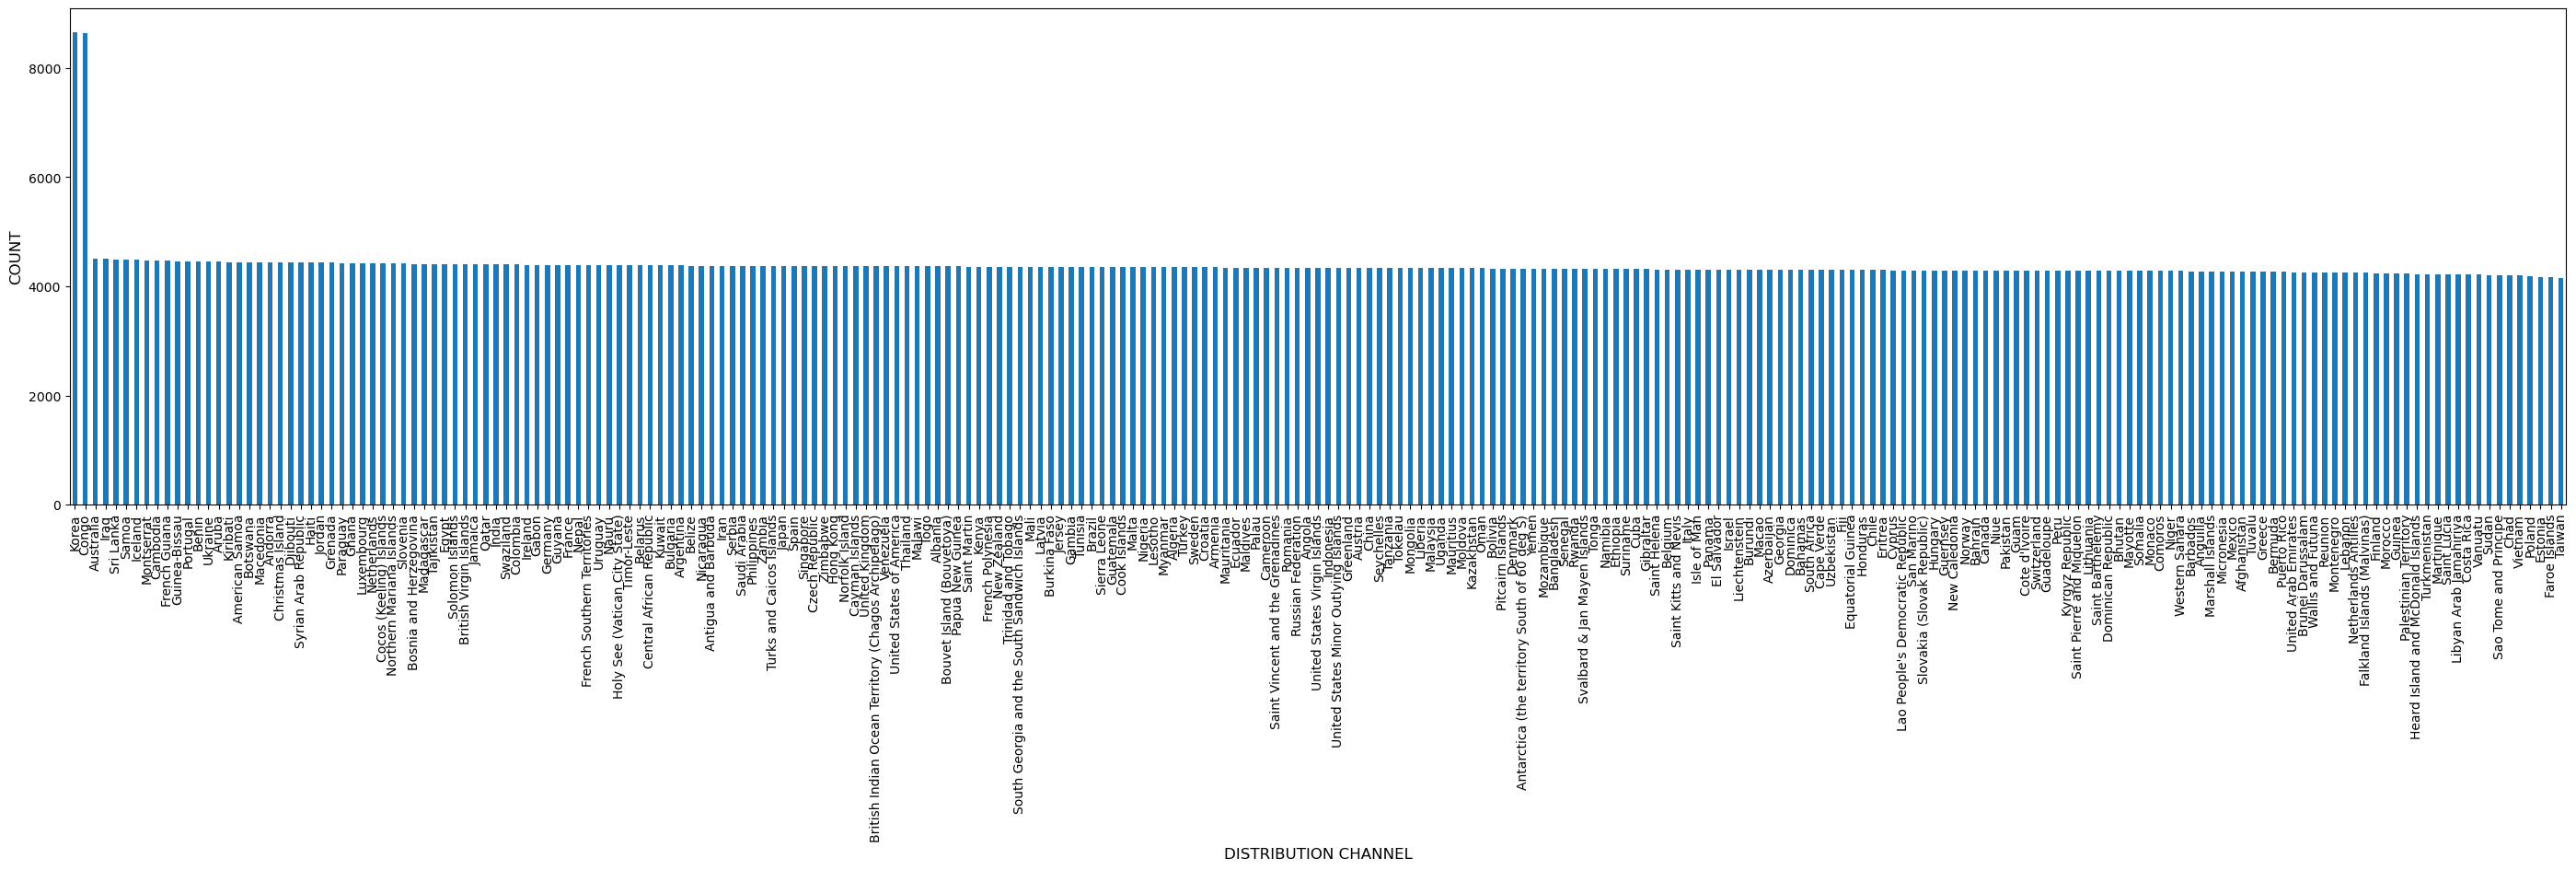

In [50]:
plt.figure(figsize=(35, 7)) 
dataset['DISTRIBUTION_CHANNEL'].value_counts().plot(kind='bar')
plt.xlabel('DISTRIBUTION CHANNEL', fontsize = 12)
plt.ylabel('COUNT', fontsize = 12)
plt.show()

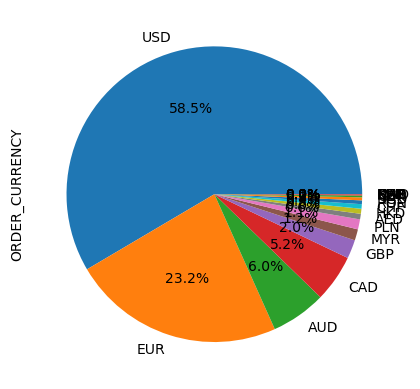

In [51]:
dataset['ORDER_CURRENCY'].value_counts().plot(kind='pie', autopct='%1.1f%%') 
plt.show()

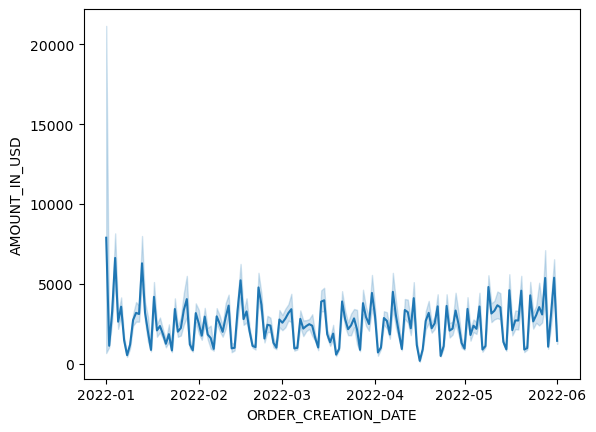

In [52]:
sns.lineplot(data=dataset, x='ORDER_CREATION_DATE', y='AMOUNT_IN_USD')
plt.show()

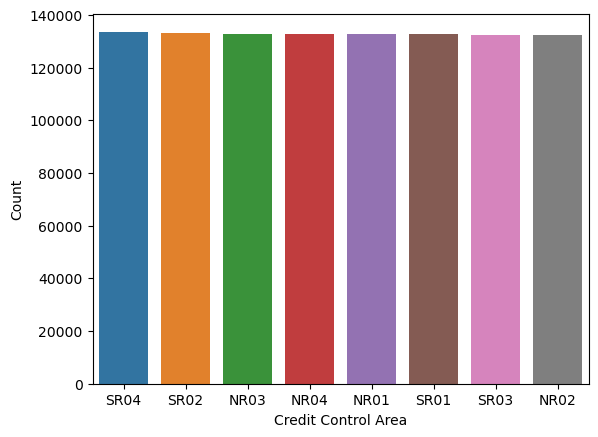

In [53]:
count = dataset['CREDIT_CONTROL_AREA'].value_counts()
key = count.index
values = count.values
sns.barplot(x=key, y=values)
plt.xlabel('Credit Control Area')
plt.ylabel('Count')
plt.show()

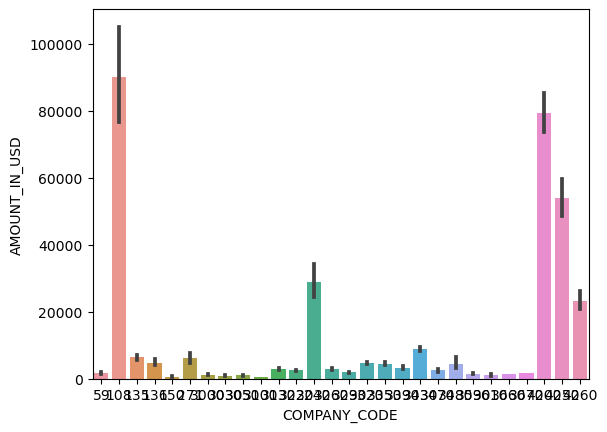

In [54]:
sns.barplot(x='COMPANY_CODE', y='AMOUNT_IN_USD', data=dataset)
plt.show()

<Axes: xlabel='DIVISION', ylabel='count'>

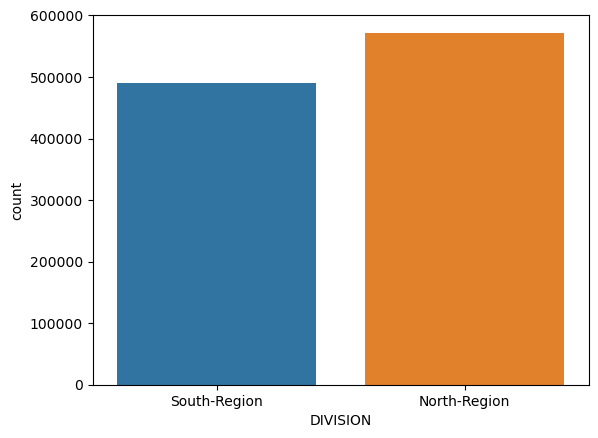

In [55]:
sns.countplot(x='DIVISION', data=dataset)

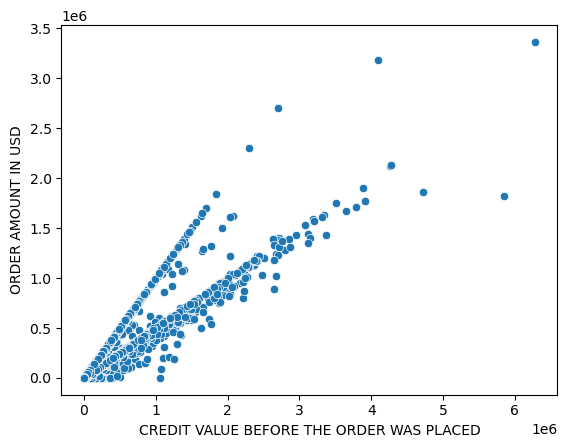

In [56]:
sns.scatterplot(x='CREDIT_VALUE', y='AMOUNT_IN_USD', data = dataset)
plt.xlabel('CREDIT VALUE BEFORE THE ORDER WAS PLACED')
plt.ylabel('ORDER AMOUNT IN USD')
plt.show()

**FEATURE ENGINEERING**

In [57]:
def out(data):

    upper_lim = data.quantile(.95)
    lower_lim = data.quantile(.05)
    print("Upper Limit : ", upper_lim, "\nLower Limit : ",lower_lim )

    data = data[(data < upper_lim) & (data > lower_lim)]
    print(data)

In [58]:
out(dataset['AMOUNT_IN_USD'])

Upper Limit :  3869.2494999999935 
Lower Limit :  0.0
0          1021.43
1           842.48
3          1503.93
5          1139.90
7           324.05
            ...   
1101913    1955.26
1101914     840.83
1101919    1021.33
1101920    3267.24
1101924    3267.24
Name: AMOUNT_IN_USD, Length: 771620, dtype: float64


In [59]:
GROUP = dataset.groupby('CREDIT_CONTROL_AREA')['AMOUNT_IN_USD'].mean()
dataset['GROUPBY_CREDIT_CONTROL'] = dataset['CREDIT_CONTROL_AREA'].map(GROUP)

In [60]:
dataset.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,AMOUNT_IN_USD,RELEASED_CREDIT_VALUE_IN_USD,UNIQUE_CUST_ID,CREDIT_VALUE,GROUPBY_CREDIT_CONTROL
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:30:12,SR02,756141537,954.61,2022-01-13,EUR,12311807,1021.43,0.00,12311807 3220 3537,1021.43,2583.772076
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:31:14,NR03,798847812,787.36,2022-01-11,EUR,12311807,842.48,0.00,12311807 3220 3449,842.48,2593.525515
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,2022-01-01 11:00:19,NR01,960984659,67493.46,2022-01-12,EUR,12118758,72218.00,88105.96,12118758 3260 3238,160323.96,2645.680732
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,2022-01-01 15:30:13,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1503.93,1574.23,1210499770 3290 3911,3078.16,2583.772076
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,2022-01-01 16:00:20,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.00,0.00,1210351400 3290 2381,0.00,2541.883968


In [61]:
GROUP = dataset.groupby('CREDIT_CONTROL_AREA')['AMOUNT_IN_USD'].mean()
dataset['GROUPBY_CREDIT_CONTROL'] = dataset['CREDIT_CONTROL_AREA'].map(GROUP)

In [62]:
GROUP = dataset.groupby('DIVISION')['AMOUNT_IN_USD'].mean()
dataset['GROUPBY_DIVISION'] = dataset['DIVISION'].map(GROUP)

In [63]:
GROUP = dataset.groupby(['COMPANY_CODE', 'SALES_ORG'])['AMOUNT_IN_USD'].agg('mean')
dataset['GROUPBY_CC_SALES_ORG'] = dataset.groupby(['COMPANY_CODE', 'SALES_ORG'])['AMOUNT_IN_USD'].transform('mean')

In [64]:
GROUP = dataset.groupby(['ORDER_CREATION_DATE','REQUESTED_DELIVERY_DATE'])['AMOUNT_IN_USD'].agg('mean')
dataset['GROUPBY_DATE'] = dataset.groupby(['ORDER_CREATION_DATE','REQUESTED_DELIVERY_DATE'])['AMOUNT_IN_USD'].transform('mean')

In [65]:
GROUP = dataset.groupby('UNIQUE_CUST_ID')['AMOUNT_IN_USD'].mean()
dataset['GROUPBY_CUST_ID'] = dataset['UNIQUE_CUST_ID'].map(GROUP)

In [66]:
GROUP = dataset.groupby('ORDER_CREATION_TIME')['AMOUNT_IN_USD'].mean()
dataset['GROUPBY_TIME'] = dataset['ORDER_CREATION_TIME'].map(GROUP)

In [67]:
dataset.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,AMOUNT_IN_USD,RELEASED_CREDIT_VALUE_IN_USD,UNIQUE_CUST_ID,CREDIT_VALUE,GROUPBY_CREDIT_CONTROL,GROUPBY_DIVISION,GROUPBY_CC_SALES_ORG,GROUPBY_DATE,GROUPBY_CUST_ID,GROUPBY_TIME
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:30:12,SR02,...,1021.43,0.00,12311807 3220 3537,1021.43,2583.772076,3228.608039,1577.677273,1448.232500,419.240625,1021.43
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:31:14,NR03,...,842.48,0.00,12311807 3220 3449,842.48,2593.525515,3228.608039,1765.743590,833.676364,203.686667,842.48
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,2022-01-01 11:00:19,NR01,...,72218.00,88105.96,12118758 3260 3238,160323.96,2645.680732,3228.608039,6049.458333,6997.736364,72218.000000,72218.00
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,2022-01-01 15:30:13,SR02,...,1503.93,1574.23,1210499770 3290 3911,3078.16,2583.772076,3228.608039,2150.365000,751.965000,1503.930000,1503.93
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,2022-01-01 16:00:20,SR01,...,0.00,0.00,1210351400 3290 2381,0.00,2541.883968,3228.608039,1128.276154,751.965000,0.000000,0.00


In [68]:
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)

    melt = melt.reset_index(drop = True)

    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt

dataset = difference_in_days(dataset,10,1,'UNIQUE_CUST_ID','ORDER_CREATION_DATE','AMOUNT_IN_USD')

In [69]:
dataset.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff,Last-8day_Diff,Last-9day_Diff,Last-10day_Diff
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:30:12,SR02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,2022-01-01 04:31:14,NR03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,2022-01-01 11:00:19,NR01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,2022-01-01 15:30:13,SR02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,2022-01-01 16:00:20,SR01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
l = ['CUSTOMER_ORDER_ID','RELEASED_CREDIT_VALUE','SOLD_TO_PARTY','ORDER_AMOUNT']
dataset.drop(l,axis=1, inplace=True)

In [71]:
dataset['COMPANY_CODE'] = dataset['COMPANY_CODE'].astype(str)

**SPLITTING DATSET INTO TRAIN, VALIDATION AND TEST USING TIME SERIES ANALYSIS**

In [72]:
data_train_val = dataset.loc[dataset['ORDER_CREATION_DATE']<='2022-04-30']
data_test =  dataset.loc[dataset['ORDER_CREATION_DATE']>'2022-04-30']

In [73]:
data_train = data_train_val.loc[dataset['ORDER_CREATION_DATE']<'2022-03-01']
data_val = data_train_val.loc[dataset['ORDER_CREATION_DATE']>='2022-03-01']

In [74]:
X_train = data_train.drop('AMOUNT_IN_USD',axis=1)
Y_train = data_train['AMOUNT_IN_USD']

In [75]:
X_val = data_val.drop('AMOUNT_IN_USD',axis=1)
Y_val = data_val['AMOUNT_IN_USD']

In [76]:
X_test = data_test.drop('AMOUNT_IN_USD',axis=1)
Y_test = data_test['AMOUNT_IN_USD']

In [77]:
X_train.shape

(422126, 40)

In [78]:
X_val.shape

(424358, 40)

In [79]:
X_test.shape

(216126, 40)

**FEATURE SELECTION**

In [80]:
correlation_matrix = X_train.corr()

In [81]:
correlation_matrix

,SALES_ORG,CUSTOMER_NUMBER,RELEASED_CREDIT_VALUE_IN_USD,CREDIT_VALUE,GROUPBY_CREDIT_CONTROL,GROUPBY_DIVISION,GROUPBY_CC_SALES_ORG,GROUPBY_DATE,GROUPBY_CUST_ID,GROUPBY_TIME,...,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff,Last-8day_Diff,Last-9day_Diff,Last-10day_Diff
SALES_ORG,1.000000,-0.000455,-0.003171,-2.432356e-03,-0.000644,0.000125,-0.000561,0.000947,-0.001259,-0.001099,...,-1.873085e-03,-0.000381,0.001289,0.000248,-0.000634,-0.000168,-0.000963,-0.000573,-0.000393,-0.000672
CUSTOMER_NUMBER,-0.000455,1.000000,0.001675,9.638598e-04,0.001660,-0.214671,-0.008287,-0.051368,0.000871,-0.000884,...,3.671358e-03,-0.001091,-0.001087,0.000217,-0.001393,-0.000396,-0.000288,-0.000448,-0.000106,-0.000151
RELEASED_CREDIT_VALUE_IN_USD,-0.003171,0.001675,1.000000,8.805295e-01,0.002081,0.025770,0.570287,0.264389,0.691765,0.639680,...,6.655839e-05,0.000128,0.000064,0.000079,0.000030,-0.000019,-0.000012,0.000032,0.000012,0.000018
CREDIT_VALUE,-0.002432,0.000964,0.880529,1.000000e+00,0.003708,0.026701,0.649268,0.322197,0.901089,0.899346,...,8.511951e-07,0.000212,0.000085,0.000127,0.000004,-0.000118,-0.000053,-0.000136,0.000072,0.000242
GROUPBY_CREDIT_CONTROL,-0.000644,0.001660,0.002081,3.708423e-03,1.000000,0.000213,0.003537,0.001181,0.004544,0.004424,...,6.571400e-04,0.001938,-0.000369,-0.000872,-0.001185,0.000542,-0.001715,0.000293,0.002191,-0.001971
GROUPBY_DIVISION,0.000125,-0.214671,0.025770,2.670096e-02,0.000213,1.000000,0.035065,0.036939,0.025648,0.022376,...,1.069696e-03,0.003613,0.002896,0.002566,0.003106,0.002709,0.002732,0.002175,0.002031,0.002535
GROUPBY_CC_SALES_ORG,-0.000561,-0.008287,0.570287,6.492681e-01,0.003537,0.035065,1.000000,0.235813,0.655461,0.595311,...,-3.795826e-03,0.000119,0.000401,-0.000158,0.000168,0.000215,0.000174,0.000105,0.000029,0.000125
GROUPBY_DATE,0.000947,-0.051368,0.264389,3.221966e-01,0.001181,0.036939,0.235813,1.000000,0.300376,0.301561,...,1.417159e-03,0.000027,0.000745,0.000558,0.000038,-0.000192,0.000187,0.000057,0.000159,0.000283
GROUPBY_CUST_ID,-0.001259,0.000871,0.691765,9.010892e-01,0.004544,0.025648,0.655461,0.300376,1.000000,0.880894,...,-1.586807e-02,-0.004516,0.000937,-0.001653,-0.000821,0.000256,0.000265,0.000069,0.000068,0.000066
GROUPBY_TIME,-0.001099,-0.000884,0.639680,8.993464e-01,0.004424,0.022376,0.595311,0.301561,0.880894,1.000000,...,1.341512e-04,0.000316,-0.000518,0.000765,-0.000115,-0.000043,-0.000037,-0.000206,0.000263,0.000018


<Axes: >

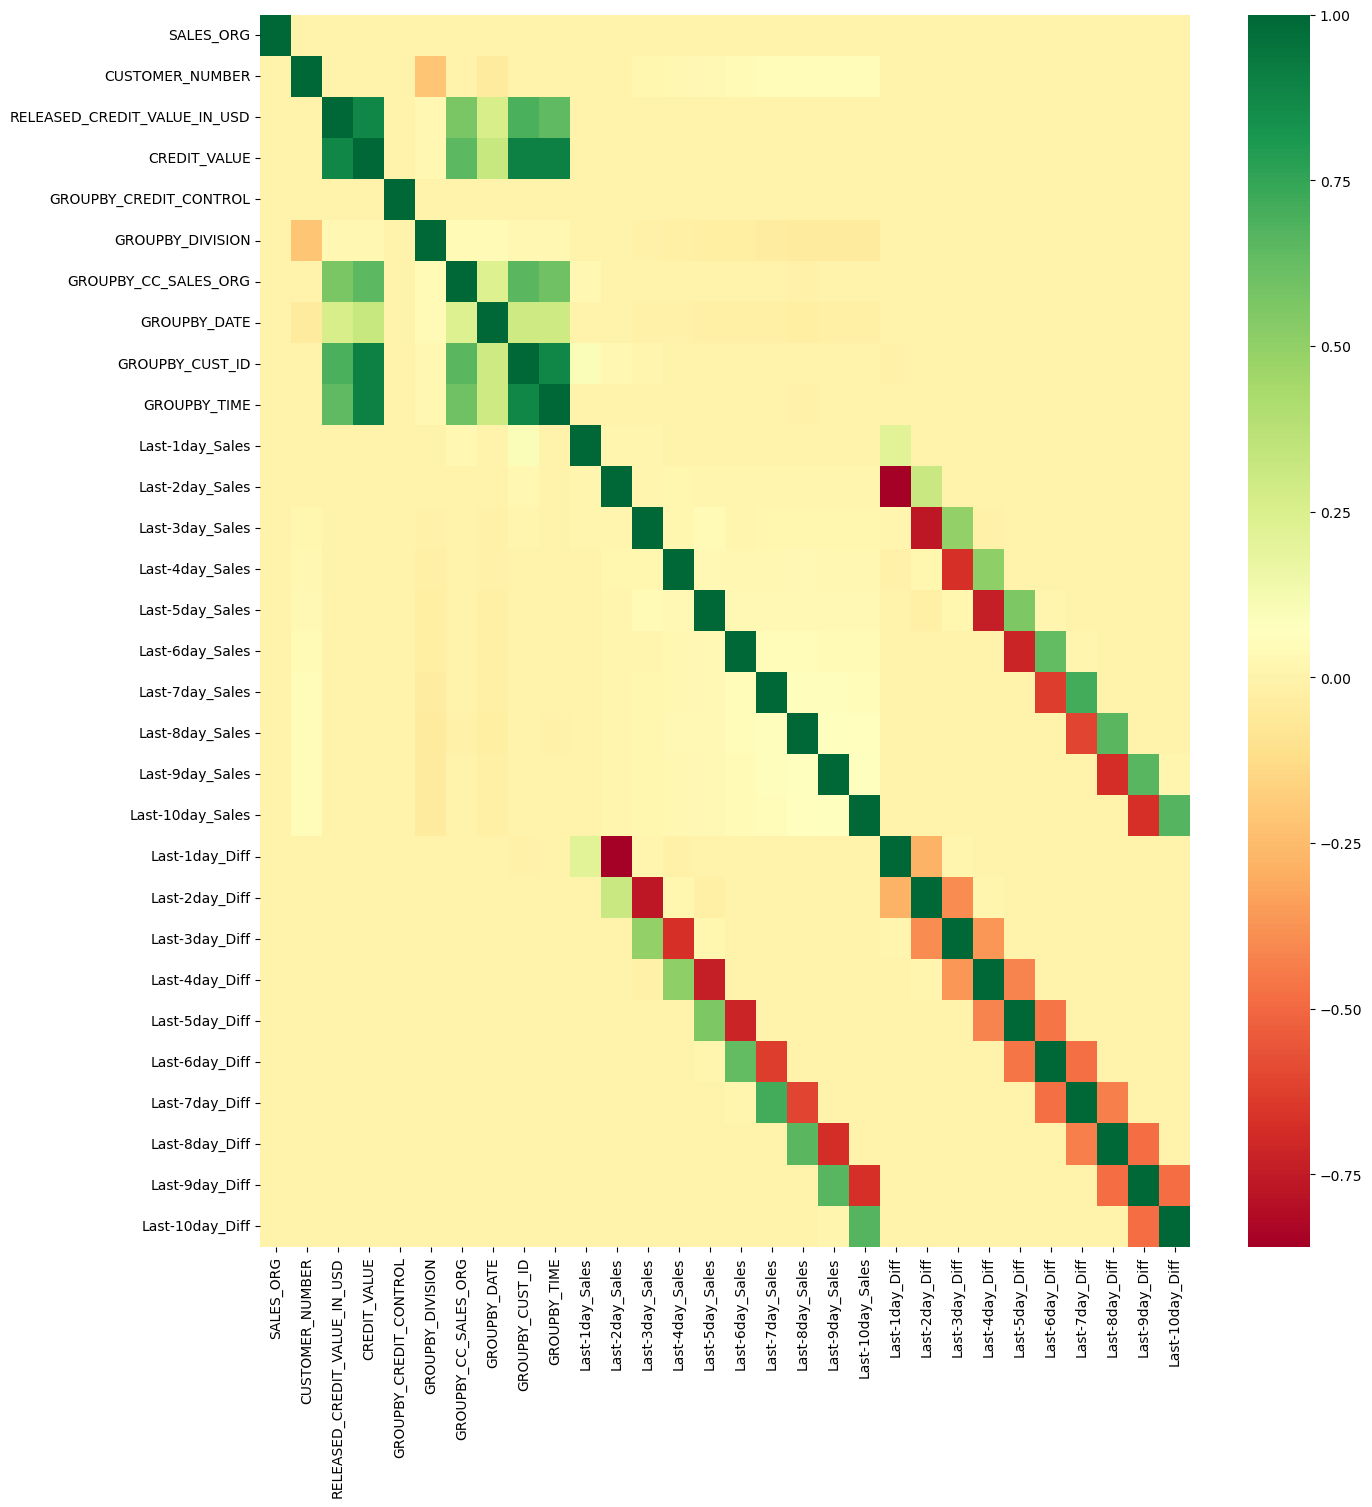

In [82]:
plt.figure(figsize=(15,16))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, cmap='RdYlGn', annot=False, fmt=".2f")

In [83]:
def correlation(dataset, threshold):
    col_cor = set()
    corr_mat = dataset.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if corr_mat.iloc[i, j]>threshold:
                colname = corr_mat.columns[i]
                col_cor.add(colname)
    return col_cor

In [84]:
corr_fea = correlation(X_train, 0.8)
len(set(corr_fea))

3

In [85]:
corr_fea

{'CREDIT_VALUE', 'GROUPBY_CUST_ID', 'GROUPBY_TIME'}

In [86]:
X_train.drop(corr_fea,axis=1,inplace=True)
X_val.drop(corr_fea,axis=1,inplace=True)
X_test.drop(corr_fea,axis=1,inplace=True)

In [87]:
l=['REQUESTED_DELIVERY_DATE','ORDER_CREATION_TIME','ORDER_CREATION_DATE','ORDER_CURRENCY','UNIQUE_CUST_ID','CUSTOMER_NUMBER']
X_train.drop(l,axis=1,inplace=True)
X_val.drop(l,axis=1,inplace=True)
X_test.drop(l,axis=1,inplace=True)

In [88]:
enc = LabelEncoder()

X_train['PURCHASE_ORDER_TYPE'] = enc.fit_transform(X_train['PURCHASE_ORDER_TYPE'])
X_train['DISTRIBUTION_CHANNEL'] = enc.fit_transform(X_train['DISTRIBUTION_CHANNEL'])
X_train['CREDIT_CONTROL_AREA'] = enc.fit_transform(X_train['CREDIT_CONTROL_AREA'])
X_train['COMPANY_CODE'] = enc.fit_transform(X_train['COMPANY_CODE'])
X_train['DIVISION'] = enc.fit_transform(X_train['DIVISION'])

X_val['PURCHASE_ORDER_TYPE'] = enc.fit_transform(X_val['PURCHASE_ORDER_TYPE'])
X_val['DISTRIBUTION_CHANNEL'] = enc.fit_transform(X_val['DISTRIBUTION_CHANNEL'])
X_val['CREDIT_CONTROL_AREA'] = enc.fit_transform(X_val['CREDIT_CONTROL_AREA'])
X_val['COMPANY_CODE'] = enc.fit_transform(X_val['COMPANY_CODE'])
X_val['DIVISION'] = enc.fit_transform(X_val['DIVISION'])

X_test['PURCHASE_ORDER_TYPE'] = enc.fit_transform(X_test['PURCHASE_ORDER_TYPE'])
X_test['DISTRIBUTION_CHANNEL'] = enc.fit_transform(X_test['DISTRIBUTION_CHANNEL'])
X_test['CREDIT_CONTROL_AREA'] = enc.fit_transform(X_test['CREDIT_CONTROL_AREA'])
X_test['COMPANY_CODE'] = enc.fit_transform(X_test['COMPANY_CODE'])
X_test['DIVISION'] = enc.fit_transform(X_test['DIVISION'])

In [89]:
num_list = ['int64','float64']
num_cols = list(X_train.select_dtypes(include=num_list).columns)

In [90]:
mutual_info = mutual_info_regression(X_train, Y_train)

In [91]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

GROUPBY_DATE                    1.438154
PURCHASE_ORDER_TYPE             0.785806
COMPANY_CODE                    0.660952
DIVISION                        0.321749
GROUPBY_DIVISION                0.321606
Last-1day_Sales                 0.295116
RELEASED_CREDIT_VALUE_IN_USD    0.250859
Last-2day_Sales                 0.197726
Last-3day_Sales                 0.151151
Last-1day_Diff                  0.144919
GROUPBY_CC_SALES_ORG            0.137537
Last-4day_Sales                 0.121964
Last-2day_Diff                  0.109688
Last-5day_Sales                 0.100220
Last-3day_Diff                  0.091509
Last-6day_Sales                 0.086593
Last-7day_Sales                 0.077343
Last-4day_Diff                  0.076192
Last-8day_Sales                 0.069300
Last-5day_Diff                  0.066443
Last-9day_Sales                 0.063903
Last-6day_Diff                  0.061466
Last-10day_Sales                0.058683
Last-7day_Diff                  0.055640
Last-8day_Diff  

<Axes: >

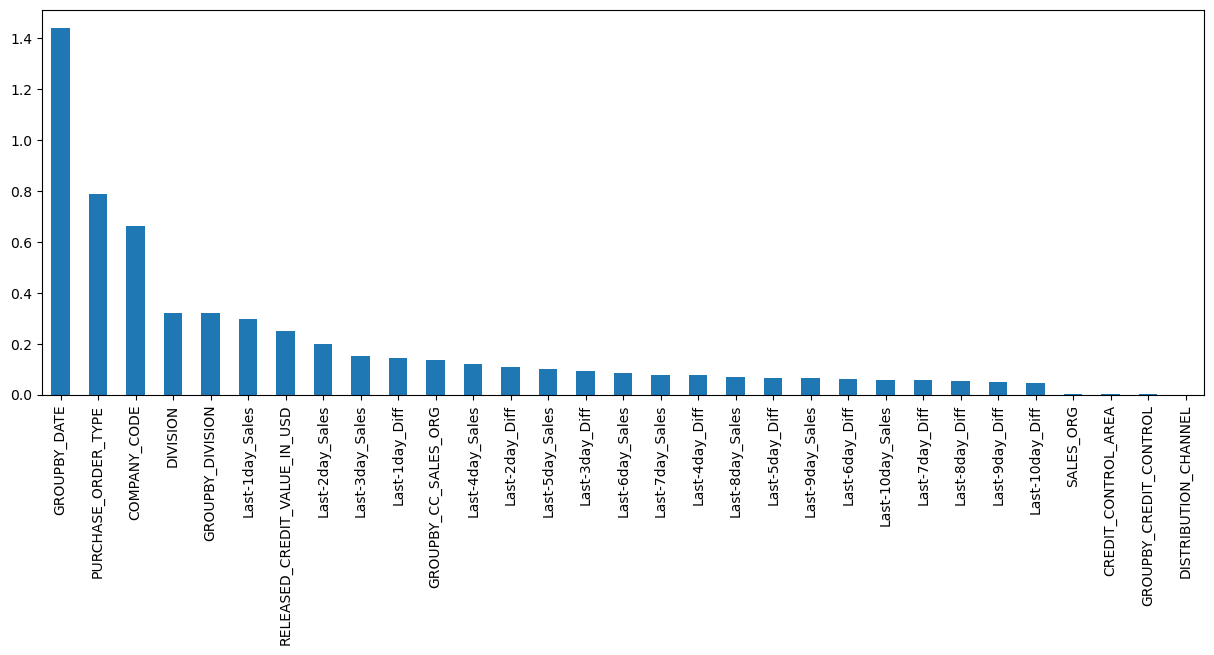

In [92]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [93]:
top_cols = SelectPercentile(mutual_info_regression, percentile=60)
top_cols.fit(X_train,Y_train)
l = X_train.columns[top_cols.get_support()]

In [94]:
X_train = X_train[l]
X_val = X_val[l]
X_test = X_test[l]

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422126 entries, 0 to 1008822
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DIVISION                      422126 non-null  int64  
 1   PURCHASE_ORDER_TYPE           422126 non-null  int64  
 2   COMPANY_CODE                  422126 non-null  int64  
 3   RELEASED_CREDIT_VALUE_IN_USD  422126 non-null  float64
 4   GROUPBY_DIVISION              422126 non-null  float64
 5   GROUPBY_CC_SALES_ORG          422126 non-null  float64
 6   GROUPBY_DATE                  422126 non-null  float64
 7   Last-1day_Sales               422126 non-null  float64
 8   Last-2day_Sales               422126 non-null  float64
 9   Last-3day_Sales               422126 non-null  float64
 10  Last-4day_Sales               422126 non-null  float64
 11  Last-5day_Sales               422126 non-null  float64
 12  Last-6day_Sales               422126 non-nu

In [96]:
X_train.skew(axis = 0, skipna = True)

DIVISION                          0.134691
PURCHASE_ORDER_TYPE              -0.933735
COMPANY_CODE                     -0.974838
RELEASED_CREDIT_VALUE_IN_USD     72.296599
GROUPBY_DIVISION                  0.134691
GROUPBY_CC_SALES_ORG             44.883041
GROUPBY_DATE                     53.166607
Last-1day_Sales                 152.150902
Last-2day_Sales                 190.768756
Last-3day_Sales                 150.546259
Last-4day_Sales                 109.669451
Last-5day_Sales                 129.116522
Last-6day_Sales                 152.987926
Last-7day_Sales                 121.190004
Last-1day_Diff                 -107.976923
Last-2day_Diff                  -30.684599
Last-3day_Diff                   33.112503
Last-4day_Diff                  -19.664236
dtype: float64

In [97]:
l = ['RELEASED_CREDIT_VALUE_IN_USD','GROUPBY_CC_SALES_ORG','GROUPBY_DATE','Last-1day_Sales','Last-2day_Sales','Last-3day_Sales','Last-4day_Sales','Last-5day_Sales','Last-6day_Sales','Last-7day_Sales','Last-1day_Diff','Last-2day_Diff']
for i in l:
    X_train[i] = X_train[i].apply(lambda x: np.log(x) if x>=np.e else x)
for i in l:
    X_val[i] = X_val[i].apply(lambda x: np.log(x) if x>=np.e else x)
for i in l:
    X_test[i] = X_test[i].apply(lambda x: np.log(x) if x>=np.e else x)
    
Y_train = Y_train.apply(lambda x: np.log(x) if x>=np.e else x)

**MODEL SELECTION**

**LINEAR REGRESSION**

In [98]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression()

In [99]:
ypredval = model1.predict(X_val)
y_pred_val = np.exp(ypredval)

In [100]:
mse = mean_squared_error(Y_val,y_pred_val)/(max(Y_val) - min(Y_val))
rmse = np.sqrt(mse)
r2 = r2_score(Y_val,y_pred_val)
print("MSE ON TRAINING DATA : ",mse)
print("RMSE ON TRAINING DATA: ",rmse)
print("R2 SCORE OF TRAINING DATA : ",r2)

MSE ON TRAINING DATA :  360.1162097420023
RMSE ON TRAINING DATA:  18.976728109503025
R2 SCORE OF TRAINING DATA :  0.032101659175104214


In [101]:
Ypred = model1.predict(X_test)
Y_pred = np.exp(Ypred)

In [102]:
mse = mean_squared_error(Y_test,Y_pred)/(max(Y_test) - min(Y_test))
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)
print("MSE ON TESTING DATA : ",mse)
print("RMSE ON TESTING DATA: ",rmse)
print("R2 SCORE OF TESTING DATA : ",r2)

MSE ON TESTING DATA :  224.40334640158602
RMSE ON TESTING DATA:  14.9800983441894
R2 SCORE OF TESTING DATA :  0.012775496615832105


**DECISION TREE**

In [103]:
model2 = DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [104]:
ypredval = model2.predict(X_val)
y_pred_val = np.exp(ypredval)

In [105]:
mse = mean_squared_error(Y_val,y_pred_val)/(max(Y_val) - min(Y_val))
rmse = np.sqrt(mse)
r2 = r2_score(Y_val,y_pred_val)
print("MSE ON TRAINING DATA : ",mse)
print("RMSE ON TRAINING DATA: ",rmse)
print("R2 SCORE OF TRAINING DATA : ",r2)

MSE ON TRAINING DATA :  431.09043269817715
RMSE ON TRAINING DATA:  20.762717372689373
R2 SCORE OF TRAINING DATA :  -0.15865851985108725


In [106]:
Ypred = model2.predict(X_test)
Y_pred = np.exp(Ypred)

In [107]:
mse = mean_squared_error(Y_test,Y_pred)/(max(Y_test) - min(Y_test))
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)
print("MSE ON TESTING DATA : ",mse)
print("RMSE ON TESTING DATA: ",rmse)
print("R2 SCORE OF TESTING DATA : ",r2)

MSE ON TESTING DATA :  196.85944719616876
RMSE ON TESTING DATA:  14.030660967900577
R2 SCORE OF TESTING DATA :  0.1339502145973971


**RANDOM FORESET**

In [108]:
model3 = RandomForestRegressor()
model3.fit(X_train,Y_train)

RandomForestRegressor()

In [109]:
ypredval = model3.predict(X_val)
y_pred_val = np.exp(ypredval)

In [110]:
mse = mean_squared_error(Y_val,y_pred_val)/(max(Y_val) - min(Y_val))
rmse = np.sqrt(mse)
r2 = r2_score(Y_val,y_pred_val)
print("MSE ON TRAINING DATA : ",mse)
print("RMSE ON TRAINING DATA: ",rmse)
print("R2 SCORE OF TRAINING DATA : ",r2)

MSE ON TRAINING DATA :  217.37391775514587
RMSE ON TRAINING DATA:  14.743605995656079
R2 SCORE OF TRAINING DATA :  0.4157556681923683


In [111]:
Ypred = model3.predict(X_test)
Y_pred = np.exp(Ypred)

In [112]:
mse = mean_squared_error(Y_test,Y_pred)/(max(Y_test) - min(Y_test))
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)
print("MSE ON TESTING DATA : ",mse)
print("RMSE ON TESTING DATA: ",rmse)
print("R2 SCORE OF TESTING DATA : ",r2)

MSE ON TESTING DATA :  125.00133611730762
RMSE ON TESTING DATA:  11.18039964032179
R2 SCORE OF TESTING DATA :  0.4500777998652239


**ADABOOST**

In [113]:
model4 = AdaBoostRegressor()
model4.fit(X_train,Y_train)

AdaBoostRegressor()

In [114]:
ypredval = model4.predict(X_val)
y_pred_val = np.exp(ypredval)

In [115]:
mse = mean_squared_error(Y_val,y_pred_val)/(max(Y_val) - min(Y_val))
rmse = np.sqrt(mse)
r2 = r2_score(Y_val,y_pred_val)
print("MSE ON TRAINING DATA : ",mse)
print("RMSE ON TRAINING DATA: ",rmse)
print("R2 SCORE OF TRAINING DATA : ",r2)

MSE ON TRAINING DATA :  371.18882980780415
RMSE ON TRAINING DATA:  19.266261438270895
R2 SCORE OF TRAINING DATA :  0.0023413476413574053


In [116]:
Ypred = model4.predict(X_test)
Y_pred = np.exp(Ypred)

In [117]:
mse = mean_squared_error(Y_test,Y_pred)/(max(Y_test) - min(Y_test))
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)
print("MSE ON TESTING DATA : ",mse)
print("RMSE ON TESTING DATA: ",rmse)
print("R2 SCORE OF TESTING DATA : ",r2)

MSE ON TESTING DATA :  226.93123329668484
RMSE ON TESTING DATA:  15.064236897257187
R2 SCORE OF TESTING DATA :  0.0016544865032678269


**XGBOOST**

In [118]:
model5 = xg.XGBRegressor()
model5.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [119]:
ypredval = model5.predict(X_val)
y_pred_val = np.exp(ypredval)

In [120]:
mse = mean_squared_error(Y_val,y_pred_val)/(max(Y_val) - min(Y_val))
rmse = np.sqrt(mse)
r2 = r2_score(Y_val,y_pred_val)
print("MSE ON TRAINING DATA : ",mse)
print("RMSE ON TRAINING DATA: ",rmse)
print("R2 SCORE OF TRAINING DATA : ",r2)

MSE ON TRAINING DATA :  31701.60579253101
RMSE ON TRAINING DATA:  178.04944760523972
R2 SCORE OF TRAINING DATA :  -84.2056386744116


In [121]:
Ypred = model5.predict(X_test)
Y_pred = np.exp(Ypred)

In [122]:
mse = mean_squared_error(Y_test,Y_pred)/(max(Y_test) - min(Y_test))
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)
print("MSE ON TESTING DATA : ",mse)
print("RMSE ON TESTING DATA: ",rmse)
print("R2 SCORE OF TESTING DATA : ",r2)

MSE ON TESTING DATA :  444.23528582207786
RMSE ON TESTING DATA:  21.07688985173282
R2 SCORE OF TESTING DATA :  -0.9543378762569341


**K-NEAREST NEIGHBOURS**

In [123]:
model6 = KNeighborsRegressor()
model6.fit(X_train,Y_train)

KNeighborsRegressor()

In [124]:
ypredval = model6.predict(X_val)
y_pred_val = np.exp(ypredval)

In [125]:
mse = mean_squared_error(Y_val,y_pred_val)/(max(Y_val) - min(Y_val))
rmse = np.sqrt(mse)
r2 = r2_score(Y_val,y_pred_val)
print("MSE ON TRAINING DATA : ",mse)
print("RMSE ON TRAINING DATA: ",rmse)
print("R2 SCORE OF TRAINING DATA : ",r2)

MSE ON TRAINING DATA :  275.4477787922837
RMSE ON TRAINING DATA:  16.59661949893061
R2 SCORE OF TRAINING DATA :  0.2596682935545772


In [126]:
Ypred = model6.predict(X_test)
Y_pred = np.exp(Ypred)

In [127]:
mse = mean_squared_error(Y_test,Y_pred)/(max(Y_test) - min(Y_test))
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)
print("MSE ON TESTING DATA : ",mse)
print("RMSE ON TESTING DATA: ",rmse)
print("R2 SCORE OF TESTING DATA : ",r2)

MSE ON TESTING DATA :  215.01047234046246
RMSE ON TESTING DATA:  14.663235398112603
R2 SCORE OF TESTING DATA :  0.054097854677945145


**SO THE BEST MODEL IS RANDOM FOREST**